In [3]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the csv file and display the data
# tweet_data = pd.read_csv("resources/covidvaccine.csv")
tweet_data = pd.read_csv("resources/vaccination_tweets.csv")

print(len(tweet_data))
tweet_data

6738


id                                   user_name  \
0     1340539111971516416                                  Rachel Roh   
1     1338158543359250433                                 Albert Fong   
2     1337858199140118533                                    eli🇱🇹🇪🇺👌   
3     1337855739918835717                               Charles Adler   
4     1337854064604966912                        Citizen News Channel   
...                   ...                                         ...   
6733  1367119942945042433                 Our Democracy Restored 1/20   
6734  1367115556864860160                                Igor Matovic   
6735  1367088455822565376  D-8 Health and Social Protection programme   
6736  1367084589605347333                            John J. Moriarty   
6737  1367077760565456896                                  Rhod Louie   

                  user_location  \
0     La Crescenta-Montrose, CA   
1             San Francisco, CA   
2                      Your Bed   
3        Vancouver, BC - Canada   
4                           NaN   
...                         ...   
6733                        NaN   
6734                   Slovakia   
6735            Abuja, Istanbul   
6736                        NaN   
6737            London, England   

                                       user_description         user_created  \
0     Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1     Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                        heil, hydra 🖐☺  2020-06-25 23:30:28   
3     Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4     Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
...                                                 ...                  ...   
6733  USN MA(MP)Desert Shield/Storm Veteran. Mom, Wi...  2011-02-25 19:40:36   
6734           Prime Minister of the Slovak Republic 🇸🇰  2020-10-28 22:06:41   
6735  Official Account | D-8 Health and Social Prote...  2019-09-15 18:26:06   
6736  I work with clinical psychologists to support ...  2020-11-16 22:15:05   
6737  Work-in-progress. Goal-oriented. ITU RN. Part ...  2010-05-02 08:23:15   

      user_followers  user_friends  user_favourites  user_verified  \
0                405          1692             3247          False   
1                834           666              178          False   
2                 10            88              155          False   
3              49165          3933            21853           True   
4                152           580             1473          False   
...              ...           ...              ...            ...   
6733             484          1186            29789          False   
6734            3910           199               10           True   
6735             330           141              509          False   
6736              11            39               27          False   
6737             254           298              117          False   

                     date                                               text  \
0     2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1     2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2     2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3     2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4     2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
...                   ...                                                ...   
6733  2021-03-03 14:29:28  #PfizerVaccine \n#PfizerBiontech \n#veteransfo...   
6734  2021-03-03 14:12:03  #EU just approved 100 000 vaccines of #PfizerB...   
6735  2021-03-03 12:24:21  What to know about #PfizerVaccine #PfizerVacci...   
6736  2021-03-03 12:09:00  Second COVID vaccine now booked!! Over the moo...   
6737  2021-03-03 11:41:51  Been checking th

In [5]:
# Display the data information
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                6738 non-null   int64 
 1   user_name         6738 non-null   object
 2   user_location     5370 non-null   object
 3   user_description  6317 non-null   object
 4   user_created      6738 non-null   object
 5   user_followers    6738 non-null   int64 
 6   user_friends      6738 non-null   int64 
 7   user_favourites   6738 non-null   int64 
 8   user_verified     6738 non-null   bool  
 9   date              6738 non-null   object
 10  text              6738 non-null   object
 11  hashtags          5075 non-null   object
 12  source            6737 non-null   object
 13  retweets          6738 non-null   int64 
 14  favorites         6738 non-null   int64 
 15  is_retweet        6738 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 750.3+ KB


In [6]:
tweet_data.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [7]:
# Filter the records with null user name 
tweet_data[tweet_data['user_name'].isnull()]

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []

The description shows that the user accounts have been withheld and no tweets are available in these records. So these records can be deleted

In [8]:
# Delete records with null user name
tweet_data.drop(tweet_data[tweet_data['user_name'].isnull()].index, inplace=True)

In [9]:
# Check if the null usernames are deleted
tweet_data[tweet_data['user_name'].isnull()]

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []

In [10]:
tweet_data[tweet_data['user_location'].isnull()]

id                    user_name user_location  \
4     1337854064604966912         Citizen News Channel           NaN   
7     1337850832256176136          Dr.Krutika Kuppalli           NaN   
8     1337850023531347969                  Erin Despas           NaN   
11    1337840331522453507                       VoiceM           NaN   
13    1337809196453081088          Dr.Krutika Kuppalli           NaN   
...                   ...                          ...           ...   
6722  1367177915222417409                 LizzAndrykew           NaN   
6723  1367177387738345473                       B.W.C.           NaN   
6726  1367172227884584960              Melissa Purcell           NaN   
6733  1367119942945042433  Our Democracy Restored 1/20           NaN   
6736  1367084589605347333             John J. Moriarty           NaN   

                                       user_description         user_created  \
4     Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
7     ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
8     Designing&selling on Teespring. Like 90s Disne...  2009-10-30 17:53:54   
11                      campaigner & optimistic realist  2020-08-31 10:38:21   
13    ID, Global Health, VHF, Pandemic Prep, Emergin...  2019-03-25 04:14:29   
...                                                 ...                  ...   
6722                                                NaN  2017-06-02 21:38:27   
6723            eccentric recluse. / gig-work gadabout.  2013-10-18 08:29:41   
6726  Surround yourself with positive people...make ...  2013-01-11 16:34:19   
6733  USN MA(MP)Desert Shield/Storm Veteran. Mom, Wi...  2011-02-25 19:40:36   
6736  I work with clinical psychologists to support ...  2020-11-16 22:15:05   

      user_followers  user_friends  user_favourites  user_verified  \
4                152           580             1473          False   
7              21924           593             7815           True   
8                887          1515             9639          False   
11                 2            25               20          False   
13             21924           593             7815           True   
...              ...           ...              ...            ...   
6722              14            44             1464          False   
6723             204          1091             4009          False   
6726             133           334            11146          False   
6733             484          1186            29789          False   
6736              11            39               27          False   

                     date                                               text  \
4     2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
7     2020-12-12 20:04:29  There have not been many bright days in 2020 b...   
8     2020-12-12 20:01:16  Covid vaccine; You getting it?\n\n #CovidVacci...   
11    2020-12-12 19:22:45  @cnnbrk #COVID19 #CovidVaccine #vaccine #Coron...   
13    2020-12-12 17:19:02  For all the women and healthcare providers who...   
...                   ...                                                ...   
6722  2021-03-03 18:19:50  Vaccinated!!! Got my first dose of #PfizerBion...   
6723  2021-03-03 18:17:44  Doing the least I (and any of us) can do, and ...   
6726  2021-03-03 17:57:14  1st Vaccine received today. #PfizerBiontech #v...   
6733  2021-03-03 14:29:28  #PfizerVaccine \n#PfizerBiontech \n#veteransfo...   
6736  2021-03-03 12:09:00  Second COVID vaccine now booked!! Over the moo...   

                                               hashtags               source  \
4        ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   
7                       ['BidenHarris', 'Election2020']   Twitter for iPhone   
8     ['CovidVaccine', 'covid19', 'PfizerBioNTech', ...      Twitter Web App   
11    ['COVID19', 'CovidVaccine', 'vaccine', 'Corona...      Twitter Web Ap

In [11]:
# tweet_data.iloc[156492,9]

In [12]:
tweet_data['user_location'].unique

<bound method Series.unique of 0       La Crescenta-Montrose, CA
1               San Francisco, CA
2                        Your Bed
3          Vancouver, BC - Canada
4                             NaN
                  ...            
6733                          NaN
6734                     Slovakia
6735              Abuja, Istanbul
6736                          NaN
6737              London, England
Name: user_location, Length: 6738, dtype: object>

In [13]:
tweet_data['user_location'].value_counts()

London, England                   109
Malaysia                           95
India                              83
London                             74
Canada                             70
                                 ... 
Wexford, Ireland                    1
Somewhere in this twitterverse      1
Kaunas, Lithuania                   1
Neuchâtel, Suisse                   1
Dubai, Mumbai                       1
Name: user_location, Length: 2005, dtype: int64

In [14]:
print(len(set(tweet_data["user_location"])))
print(set(tweet_data["user_location"]))

2006
{nan, 'belgium', 'Greater Manchester', 'Toronto ON Canada', 'Kenora, Ontario', 'İstanbul, Türkiye', 'Dubai United Arab Emirates', 'North West, England', 'Middle of Nowhere, USA', 'Syracuse, NY', 'Salisbury Plain', 'All over the place', 'Rotherham, England', 'Wakefield, England', 'England, United Kingdom', 'Rochester NY', "EWR but I'd rather be in OGG", 'Singapore', 'LA | OC ', 'on Twitter, obviously', 'Bury, England', 'Hyderabad', 'Go figure...', 'Falmouth, England', 'Londres', 'Reading, Planet Earth', 'ليس مهم ', 'Bethesda, MD', 'Roma, Italia', 'ÜT: 10.466333,-66.865167', 'Belgique', 'Nigeria', 'Unama’ki', 'South West, England', 'Toronto', 'US', 'Life in England, home in Wales', 'Black Hole', 'San Francisco, singapore ', 'Abuja, Nigeria', 'Athens, Greece', 'ÜT: 34.080227,-118.453027', 'PITTSBURGH (412)', "N 51°27' 0'' / W 0°12' 0''", 'Maldives', 'मोक्षनगरी, ग्रामीण भारत', 'US | Singapore', 'Jackson, MS', 'Bristol, UK', 'Atlanta, US', 'Toronto ', 'Niedersachsen, Deutschland', 'Isl

In [15]:
tweet_data[tweet_data['user_location'] == '...']

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []

In [16]:
tweet_data.shape

(6738, 16)

In [17]:
tweet_data['source']

0       Twitter for Android
1           Twitter Web App
2       Twitter for Android
3           Twitter Web App
4        Twitter for iPhone
               ...         
6733     Twitter for iPhone
6734     Twitter for iPhone
6735    Twitter for Android
6736    Twitter for Android
6737     Twitter for iPhone
Name: source, Length: 6738, dtype: object

In [18]:
# Twitter sources
print(len(set(tweet_data["source"])))
tweet_data['source'].unique

45


<bound method Series.unique of 0       Twitter for Android
1           Twitter Web App
2       Twitter for Android
3           Twitter Web App
4        Twitter for iPhone
               ...         
6733     Twitter for iPhone
6734     Twitter for iPhone
6735    Twitter for Android
6736    Twitter for Android
6737     Twitter for iPhone
Name: source, Length: 6738, dtype: object>

In [19]:
df = tweet_data.groupby(['source'])['user_name'].count().sort_values().reset_index()
df

source  user_name
0            Hocalwire Social Share          1
1                    SocialNewsDesk          1
2                        News Users          1
3                      News Medical          1
4                      Socialbakers          1
5               Sprinklr Publishing          1
6                   ThreadReaderApp          1
7           TweetCaster for Android          1
8                  Tweetbot for Mac          1
9                           Publer           1
10                         EastMojo          1
11                            Canva          1
12   Twitter Media Studio - LiveCut          1
13           UberSocial for Android          1
14                       Flying Eze          1
15                       GT_Backend          2
16                    WordPress.com          2
17  Falcon Social Media Management           2
18                    Sprout Social          2
19                     ETRetail.com          2
20                       CoSchedule          2
21                         Paper.li          2
22             Twitter Media Studio          3
23                          dlvr.it          3
24                    Nelio Content          3
25                          Echobox          3
26                 Tweetbot for iΟS          4
27                  Twitter for Mac          4
28                       24liveblog          4
29         Microsoft Power Platform          5
30                         Sendible          6
31                         LinkedIn          6
32                       SocialFlow          7
33                            Nonli          8
34                  Blog2Social APP          8
35                            IFTTT         13
36                   Hootsuite Inc.         38
37                           Buffer         46
38                        Instagram         54
39                 Twitter for iPad        186
40                        TweetDeck        388
41              Twitter for Android       1568
42                  Twitter Web App       1956
43               Twitter for iPhone       2395

In [20]:


df1 = df[df["user_name"]>=100]
fig = px.bar(df1, x="user_name", y="source", orientation='h',width=900,height=700,title="Most frequent ways Twitter users accessed their accounts")
fig.show()


In [21]:
tweet_data['text']

0       Same folks said daikon paste could treat a cyt...
1       While the world has been on the wrong side of ...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3       Facts are immutable, Senator, even when you're...
4       Explain to me again why we need a vaccine @Bor...
                              ...                        
6733    #PfizerVaccine \n#PfizerBiontech \n#veteransfo...
6734    #EU just approved 100 000 vaccines of #PfizerB...
6735    What to know about #PfizerVaccine #PfizerVacci...
6736    Second COVID vaccine now booked!! Over the moo...
6737    Been checking this from time to time but still...
Name: text, Length: 6738, dtype: object

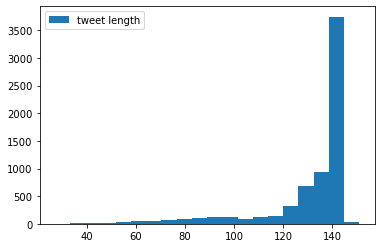

In [22]:
# Draw a histogram to plot the tweet lengths
plt.hist(tweet_data['text'].str.len(), bins=20, label = "tweet length")
plt.figsize = (18,12)
plt.legend()

In [23]:
for index, tweet in enumerate(tweet_data["text"][10:15]):
    print(index+1, ".", tweet)

1 . while deaths are closing in on the 300,000 mark... millions of people wait #PfizerBioNTech #Vaccine !
-
The first U… https://t.co/uQ3A2f7SVP
2 . @cnnbrk #COVID19 #CovidVaccine #vaccine #Corona   #PfizerBioNTech #bbcnews #NYTimes #BBCNews Best wishes to the US… https://t.co/9xWmfU3LZj
3 . The agency also released new information for health care providers and for patients as the US shipped millions of d… https://t.co/sG6BtD7jD9
4 . For all the women and healthcare providers who have been asking about the safety of the #PfizerBioNTech… https://t.co/ow0Pglkwte
5 . "Expect 145 sites across all the states to receive vaccine on Monday, another 425 sites on Tuesday," said the offic… https://t.co/HiUVYJzOBY


In [24]:
# Check if the tweet is null
tweet_data[tweet_data['text'].isnull()]

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []

In [25]:
# Remove records with no tweet data
tweet_data.drop(tweet_data[tweet_data['text'].isnull()].index, inplace=True)

In [26]:
tweet_data[tweet_data['text'].isnull()]

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []

In [27]:
import re

# Clen the text, remove the noises
def clean_text(text):
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Filter to select only the alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
        
    #Convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [28]:
# i=0
# for tweet in tweet_data['text']:
#     print(i)
#     print(clean_text(tweet))
#     i+=1

In [29]:
# tweet_data.iloc[23986,9]

In [30]:
tweet_data.text

0       Same folks said daikon paste could treat a cyt...
1       While the world has been on the wrong side of ...
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3       Facts are immutable, Senator, even when you're...
4       Explain to me again why we need a vaccine @Bor...
                              ...                        
6733    #PfizerVaccine \n#PfizerBiontech \n#veteransfo...
6734    #EU just approved 100 000 vaccines of #PfizerB...
6735    What to know about #PfizerVaccine #PfizerVacci...
6736    Second COVID vaccine now booked!! Over the moo...
6737    Been checking this from time to time but still...
Name: text, Length: 6738, dtype: object

In [31]:
tweet_data['clean_text'] = tweet_data.text.apply(lambda x: clean_text(x))

In [32]:
tweet_data

id                                   user_name  \
0     1340539111971516416                                  Rachel Roh   
1     1338158543359250433                                 Albert Fong   
2     1337858199140118533                                    eli🇱🇹🇪🇺👌   
3     1337855739918835717                               Charles Adler   
4     1337854064604966912                        Citizen News Channel   
...                   ...                                         ...   
6733  1367119942945042433                 Our Democracy Restored 1/20   
6734  1367115556864860160                                Igor Matovic   
6735  1367088455822565376  D-8 Health and Social Protection programme   
6736  1367084589605347333                            John J. Moriarty   
6737  1367077760565456896                                  Rhod Louie   

                  user_location  \
0     La Crescenta-Montrose, CA   
1             San Francisco, CA   
2                      Your Bed   
3        Vancouver, BC - Canada   
4                           NaN   
...                         ...   
6733                        NaN   
6734                   Slovakia   
6735            Abuja, Istanbul   
6736                        NaN   
6737            London, England   

                                       user_description         user_created  \
0     Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1     Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                        heil, hydra 🖐☺  2020-06-25 23:30:28   
3     Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4     Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   
...                                                 ...                  ...   
6733  USN MA(MP)Desert Shield/Storm Veteran. Mom, Wi...  2011-02-25 19:40:36   
6734           Prime Minister of the Slovak Republic 🇸🇰  2020-10-28 22:06:41   
6735  Official Account | D-8 Health and Social Prote...  2019-09-15 18:26:06   
6736  I work with clinical psychologists to support ...  2020-11-16 22:15:05   
6737  Work-in-progress. Goal-oriented. ITU RN. Part ...  2010-05-02 08:23:15   

      user_followers  user_friends  user_favourites  user_verified  \
0                405          1692             3247          False   
1                834           666              178          False   
2                 10            88              155          False   
3              49165          3933            21853           True   
4                152           580             1473          False   
...              ...           ...              ...            ...   
6733             484          1186            29789          False   
6734            3910           199               10           True   
6735             330           141              509          False   
6736              11            39               27          False   
6737             254           298              117          False   

                     date                                               text  \
0     2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1     2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2     2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3     2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4     2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   
...                   ...                                                ...   
6733  2021-03-03 14:29:28  #PfizerVaccine \n#PfizerBiontech \n#veteransfo...   
6734  2021-03-03 14:12:03  #EU just approved 100 000 vaccines of #PfizerB...   
6735  2021-03-03 12:24:21  What to know about #PfizerVaccine #PfizerVacci...   
6736  2021-03-03 12:09:00  Second COVID vaccine now booked!! Over the moo...   
6737  2021-03-03 11:41:51  Been checking th

In [33]:
# Exhaustive list of stopwords in the english language. We want to focus less on these so at some point will have to filter
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and',
              'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below',
              'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did',
              "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever',
              'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having',
              'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how',
              "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it',
              "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself',
              'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours',
              'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's",
              'should', "shouldn't", 'since', 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs',
              'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", "they'll", "they're",
              "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', "wasn't",
              'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
              "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's", 'with', "won't", 'would', "wouldn't",
              'www', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'https', '&amp']

In [34]:
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

In [35]:
#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

In [36]:
#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [37]:
#Generate word frequency
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()
    
    #Drop the stopwords during the frequency calculation
    word_freq = word_freq.drop(STOP_WORDS, errors='ignore')
    
    return word_freq

In [38]:
dataset = tweet_data

In [39]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

### Plot the word cloud

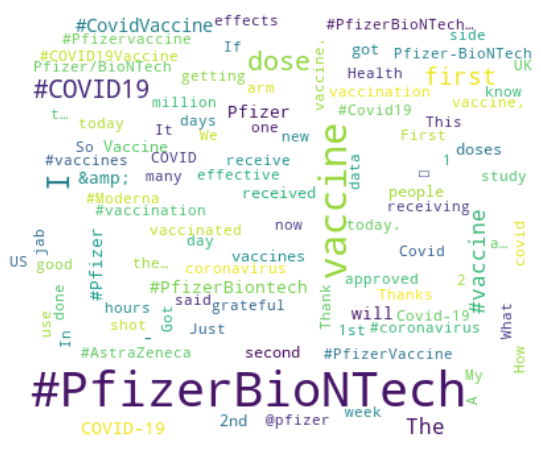

In [40]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(tweet_data.text.str)
# word_freq

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

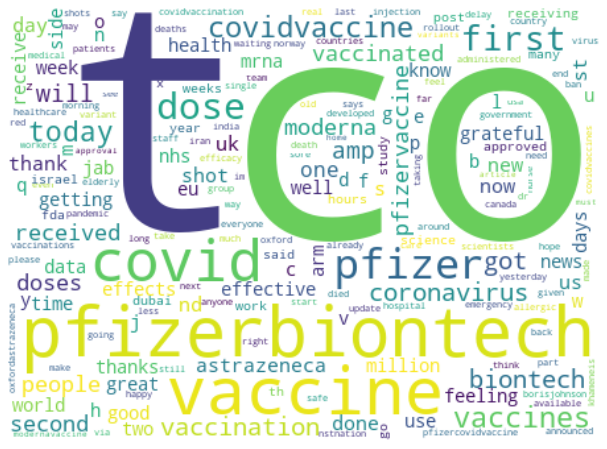

In [41]:
# Plot the word cloud
import re
text = tweet_data.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str) * 100
word_freq = word_freq.drop(labels=STOP_WORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
dataset.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date  ...               source retweets favorites  \
0  2020-12-20 06:06:44  ...  Twitter for Android        0         0   
1  2020-12-13 16:27:13  ...      Twitter Web App        1         1   
2  2020-12-12 20:33:45  ...  Twitter for Android        0         0   
3  2020-12-12 20:23:59  ...      Twitter Web App      446      2129   
4  2020-12-12 20:17:19  ...   Twitter for iPhone        0         0   

   is_retweet                                         clean_text  word_count  \
0       False  same folks said daikon paste could treat a cyt...          16   
1       False  while the world has been on the wrong side of ...          24   
2       False   coronavirus  sputnikv  astrazeneca  pfizerbio...          18   
3       False  facts are immutable  senator  even when you're...          23   
4       False  explain to me again why we need a vaccine  bor...          17   

  any_neg  is_question  any_rare  char_count  
0       0            0         0          97  
1       0            0         0         139  
2       0            0         0         139  
3       1            1         0         139  
4       0            1         0         134  

[5 rows x 22 columns]

In [54]:
list(dataset['clean_text'])

['same folks said daikon paste could treat a cytokine storm  pfizerbiontech https   t co xehhimg kf',
 "while the world has been on the wrong side of history this year  hopefully  the biggest vaccination effort we've ev https   t co dlchrzjkhm",
 ' coronavirus  sputnikv  astrazeneca  pfizerbiontech  moderna  covid    russian vaccine is created to last     years https   t co ieylckbr p',
 "facts are immutable  senator  even when you're not ethically sturdy enough to acknowledge them      you were born i https   t co jqgv  kch ",
 'explain to me again why we need a vaccine  borisjohnson  matthancock  whereareallthesickpeople  pfizerbiontech https   t co kxbsrobehq',
 'does anyone have any useful advice guidance for whether the covid vaccine is safe whilst breastfeeding  https   t co eifsyqoekn',
 'it is a bit sad to claim the fame for success of  vaccination on patriotic competition between usa  canada  uk and https   t co ifmraygytp',
 'there have not been many bright days in      but h

In [51]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [57]:
# tokenize words - Split the sentences into words
for text in dataset['clean_text']:
    print(word_tokenize(text))

['same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'a', 'cytokine', 'storm', 'pfizerbiontech', 'https', 't', 'co', 'xehhimg', 'kf']
['while', 'the', 'world', 'has', 'been', 'on', 'the', 'wrong', 'side', 'of', 'history', 'this', 'year', 'hopefully', 'the', 'biggest', 'vaccination', 'effort', 'we', "'ve", 'ev', 'https', 't', 'co', 'dlchrzjkhm']
['coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbiontech', 'moderna', 'covid', 'russian', 'vaccine', 'is', 'created', 'to', 'last', 'years', 'https', 't', 'co', 'ieylckbr', 'p']
['facts', 'are', 'immutable', 'senator', 'even', 'when', 'you', "'re", 'not', 'ethically', 'sturdy', 'enough', 'to', 'acknowledge', 'them', 'you', 'were', 'born', 'i', 'https', 't', 'co', 'jqgv', 'kch']
['explain', 'to', 'me', 'again', 'why', 'we', 'need', 'a', 'vaccine', 'borisjohnson', 'matthancock', 'whereareallthesickpeople', 'pfizerbiontech', 'https', 't', 'co', 'kxbsrobehq']
['does', 'anyone', 'have', 'any', 'useful', 'advice', 'guidance', 'for', 'wheth

['world', 'war', 'ii', 'army', 'veteran', 'john', 'stephens', 'salutes', 'after', 'receiving', 'a', 'covid', 'vaccine', 'at', 'a', 'veterans', 'affairs', 'long', 'https', 't', 'co', 'i', 'sc', 'zah']
['all', 'five', 'of', 'us', 'at', 'kessler', 'womens', 'healthcare', 'have', 'received', 'our', 'first', 'dose', 'of', 'coronavirus', 'vaccine', 'pfizer', 'version', 'https', 't', 'co', 'z', 'vnncvqo']
['the', 'us', 'says', 'it', 'will', 'have', 'enough', 'vaccines', 'even', 'to', 'distribute', 'to', 'other', 'countries', 'click', 'to', 'see', 'more', 'https', 't', 'co', 'lshw', 'bmko']
['igottheshot', 'today', 'at', 'westside', 'regional', 'medical', 'center', 'pfizercovidvaccine', 'covidvaccine', 'pfizerbiontech', 'https', 't', 'co', 'gw', 'wpi', 'ob']
['hawleymo', 'tells', 'fox', 'now', 'the', 'state', 'was', 'slated', 'to', 'have', 'doses', 'of', 'the', 'covidvaccine', 'by', 'the', 'end', 'of', 'dec', 'but', 'wi', 'https', 't', 'co', 'ohfuriczuc']
['chile', 'authorizes', 'pfizer', 'vac

['coronavirus', 'vaccine', 'a', 'miraculous', 'result', 'of', 'frontiers', 'of', 'modern', 'biotechnology', 'amp', 'information', 'technology', 'entire', 'dev', 'https', 't', 'co', 'uzrvbgwjvm']
['the', 'effective', 'pfizer', 'vaccine', 'is', 'being', 'rolled', 'out', 'for', 'all', 'dubai', 'residents', 'starting', 'today', 'free', 'of', 'cost', 'https', 't', 'co', 'dnd', 'zymyhv']
['tony', 'blair', 'makes', 'a', 'good', 'point', 'one', 'shot', 'for', 'everyone', 'to', 'curb', 'the', 'pandemic', 'now', 'sarscov', 'vaccination', 'https', 't', 'co', 'tmnhm', 'ena']
['singapore', 'on', 'december', 'became', 'the', 'first', 'asian', 'country', 'to', 'begin', 'its', 'vaccination', 'programme', 'with', 'pfizer', 'biontech', "'s", 'c', 'https', 't', 'co', 'eqjlna', 'utn']
['three', 'sizes', 'available', 'on', 'my', 'etsy', 'shop', 'https', 't', 'co', 'oitzsegru', 'igottheshot', 'vaccination', 'vaccine', 'vaccinated', 'https', 't', 'co', 'qkcr', 'zqu', 'e']
['explainer', 'where', 'are', 'we', 

['as', 'a', 'frontline', 'nhs', 'worker', 'i', 'gladly', 'received', 'my', 'first', 'pfizerbiontech', 'vaccination', 'today', 'hullhospitals', 'id', 'urge', 'eve', 'https', 't', 'co', 'zdvsfmzwap']
['i', 'got', 'my', 'first', 'jab', 'of', 'pfizerbiontech', 'vaccine', 'on', 'the', 'eve', 'of', 'i', 'chose', 'to', 'keep', 'my', 'apprehensions', 'aside', 'trust', 'the', 'https', 't', 'co', 'adcnor', 'ffr']
['pfizerbiontech', 'covidvaccine', 'my', 'heart', 'aches', 'after', 'yesterdays', 'tragedy', 'but', 'i', 'dont', 'feel', 'a', 'thing', 'from', 'this', 's', 'https', 't', 'co', 'lodod', 'x', 'kq']
['my', 'year', 'old', 'grandad', 'got', 'the', 'vaccine', 'this', 'morning', 'thank', 'you', 'science', 'one', 'step', 'closer', 'to', 'a', 'hug', 'vaccineday', 'https', 't', 'co', 'f', 'ysqf', 'u']
['ive', 'just', 'had', 'my', 'first', 'dose', 'of', 'pfizerbiontech', 'vaccine', 'and', 'in', 'the', 'words', 'of', 'tony', 'the', 'tiger', 'i', 'feel', 'greeeaaat', 'hullhospitals', 'thankyou']
['t

['so', 'happy', 'to', 'receive', 'my', 'covidvaccination', 'i', 'can', 'confirm', 'the', 'main', 'side', 'effect', 'is', 'indeed', 'euphoria', 'covid', 'thank', 'you', 'https', 't', 'co', 'vu', 'l', 'fkgpx']
['cdnpoli', 'no', 'ordinary', 'joe', 'president', 'biden', 'will', 'get', 'his', 'second', 'dose', 'on', 'time', 'on', 'monday', 'exactly', 'according', 'to', 'fda', 'and', 'https', 't', 'co', 'gssx', 'azo']
['why', 'are', 'you', 'gon', 'na', 'settle', 'for', 'anything', 'less', 'if', 'you', 'have', 'the', 'best', 'pfizer', 'pfizervaccine', 'pfizervaccine', 'pfizerbiontech', 'pfizer']
['eddwilson', 'olivers', 'aunty', 'paul', 'astell', 'nadhimzahawi', 'doctorshaib', 'by', 'delaying', 'the', 'pfizerbiontech', 'boosters', 'they', 'can', 'https', 't', 'co', 'kvyojphmeu']
['the', 'who', 'has', 'listed', 'the', 'pfizerbiontech', 'covid', 'vaccine', 'for', 'emergency', 'use', 'the', 'validation', 'opens', 'the', 'door', 'for', 'count', 'https', 't', 'co', 'gk', 'uyy', 'uj']
['from', 'the

['were', 'proud', 'of', 'you', 'pfizer', 'well', 'continue', 'to', 'power', 'your', 'growth', 'with', 'our', 'ai', 'led', 'technologies', 'here', "'s", 'to', 'more', 'breakt', 'https', 't', 'co', 'cqcs', 'pfqob']
['news', 'cowansview', 'south', 'africa', 'had', 'started', 'thinking', 'about', 'vaccines', 'a', 'long', 'time', 'ago', 'with', 'our', 'early', 'meetings', 'with', 'https', 't', 'co', 'sqdwur', 'p']
['breaking', 'panama', 'has', 'just', 'received', 'doses', 'of', 'the', 'pfizerbiontech', 'vaccine', 'panavac', 'llegadavacunas', 'https', 't', 'co', 'uvxppjafch']
['breaking', 'panama', 'has', 'just', 'received', 'doses', 'of', 'the', 'pfizerbiontech', 'vaccine', 'panavac', 'llegadavacunas', 'https', 't', 'co', 'e', 'i', 'mhjdcg']
['breaking', 'panama', 'has', 'just', 'received', 'doses', 'of', 'the', 'pfizerbiontech', 'vaccine', 'panavac', 'llegadavacunas', 'https', 't', 'co', 'ukwvxadyez']
['gmb', 'drhilaryjones', 'only', 'because', 'there', "'s", 'no', 'data', 'available', 'ye

['the', 'pharmaceutical', 'giant', 'pfizer', 'paid', 'over', 'billion', 'in', 'settlements', 'for', 'injury', 'death', 'and', 'fraud', 'claims', 'now', 'a', 'le', 'https', 't', 'co', 'hzxckq', 'd', 'x']
['ukgovtweets', 'and', 'vaccinetaskforceuk', 'has', 'done', 'a', 'great', 'job', 'in', 'spreading', 'their', 'bets', 'very', 'early', 'on', 'during', 'the', 'race', 'fo', 'https', 't', 'co', 'psl', 'vjuqli']
['contents', 'of', 'the', 'pfizer', 'vaccine', 'pfizer', 'pfizerbiontech', 'https', 't', 'co', 'gprfye', 'em']
['grateful', 'for', 'the', 'opportunity', 'to', 'protect', 'myself', 'others', 'and', 'a', 'small', 'community', 'of', 'idiots', 'pfizerbiontech', 'https', 't', 'co', 'vmtrlvccly']
['one', 'down', 'one', 'to', 'go', 'tjuhospital', 'covid', 'vaccine', 'pfizerbiontech', 'https', 't', 'co', 'klyaj', 'bdzl']
['had', 'my', 'first', 'vaccination', 'today', 'kingscollegenhs', 'very', 'well', 'organised', 'getvaccinated', 'covidvaccination', 'pfizerbiontech']
['novartis', 'stein', 

['pfizer', 'biontech', 'covid', 'vaccine', 'is', 'effective', 'in', 'a', 'huge', 'real', 'world', 'study', 'coronavirus', 'covid', 'covid', 'https', 't', 'co', 'rgh', 'd', 'q', 'ha']
['vienna', 'calling', 'https', 't', 'co', 'rgd', 'qoo', 'te', 'via', 'youtube', 'astrazeneca', 'pfizerbiontech', 'gatesofoblivion']
['pfizerbiontech', 'covid', 'vaccine', 'coursing', 'through', 'my', 'body', 'windingwheel']
['asone', 'we', 'will', 'always', 'commit', 'to', 'connecting', 'people', 'improving', 'lives', 'with', 'our', 'expertise', 'in', 'logistics', 'and', 'transportat', 'https', 't', 'co', 'l', 'tfxh', 'gre']
['we', 'are', 'proud', 'to', 'have', 'the', 'opportunity', 'to', 'make', 'a', 'difference', 'connecting', 'people', 'and', 'improving', 'lives', 'with', 'this', 'deliver', 'https', 't', 'co', 'vavuqi', 'noy']
['a', 'huge', 'shoutout', 'to', 'all', 'the', 'heroes', 'involved', 'in', 'this', 'momentous', 'event', 'let', 'the', 'vaccination', 'begin', 'malaysia', "'s", 'fir', 'https', 't'

In [61]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

print(lemm)

<WordNetLemmatizer>


In [62]:
from nltk.corpus import wordnet


# get synonyms
wordnet.synsets('good')

[Synset('good.n.01'),
 Synset('good.n.02'),
 Synset('good.n.03'),
 Synset('commodity.n.01'),
 Synset('good.a.01'),
 Synset('full.s.06'),
 Synset('good.a.03'),
 Synset('estimable.s.02'),
 Synset('beneficial.s.01'),
 Synset('good.s.06'),
 Synset('good.s.07'),
 Synset('adept.s.01'),
 Synset('good.s.09'),
 Synset('dear.s.02'),
 Synset('dependable.s.04'),
 Synset('good.s.12'),
 Synset('good.s.13'),
 Synset('effective.s.04'),
 Synset('good.s.15'),
 Synset('good.s.16'),
 Synset('good.s.17'),
 Synset('good.s.18'),
 Synset('good.s.19'),
 Synset('good.s.20'),
 Synset('good.s.21'),
 Synset('well.r.01'),
 Synset('thoroughly.r.02')]

In [45]:
split_it=str(filtered_sentence).split()

NameError: name 'filtered_sentence' is not defined

In [44]:
from collections import Counter 
Counter = Counter(split_it) 
most_occur = Counter.most_common(100) 

frequentwords=pd.DataFrame(most_occur).rename(columns={0:"Words",1:"Frequencies"})

frequentwords=frequentwords.sort_values(by="Frequencies")
fig = px.bar(frequentwords, x="Frequencies", y="Words", orientation='h',width=800,height=1800)
fig.show()

NameError: name 'split_it' is not defined